# Predicting human dopamine D1 receptor antagonists using 13C NMR spectroscopy data

## Content   <a name="content"></a>

1. [Upload and analyse NMR spectroscopy data](#1)
2. [Create a dataframe merging the NMR data frame to the data frame holding the labels](#2)
3. [Ensure an equal number of classes in the test sets](#3)
4. [Scaling](#4)
5. [Balancing](#5)
6. [PCA](#6)
7. [Machine Learning](#7)
8. [Five-fold cross validation](#8)
9. [Scrutinise for overfitting of the MLmodel with default hyperparameter values (kernel='rbf', C=1.0, gamma=’scale’)](#9)
10. [Hyperparameter tuning with Optuna](#10)
11. [Scrutinise for overfitting using hyperparameter tuned by Optuna](#11)
12. [Final ML model](#12)
13. [Plot the learning curve and ROC](#13)
14. [Confusion matrix, classification report and AUC](#14)

## Upload and analyse NMR spectroscopy data <a name="1"></a>

In [1]:
import pandas as pd 

# load the converted nmr dataset
df_nmr = pd.read_csv('output.csv')

# To avoid truncation of some columns during data frame display
pd.set_option('display.max_columns', None) 

# Display the data frame
print('Shape of df_nmr: ', df_nmr.shape)
df_nmr.head()

Shape of df_nmr:  (59608, 301)


,CID,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299
0,5014398,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,3,4,0,0,0,0,0,0,0,0,2,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2811632,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,1,0,0,0,2,0,0,0,1,0,0,0,0,2,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,20914080,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,4,2,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,9583315,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,2,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1916664,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,6,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [2]:
# Identify columns with only zeros
columns_to_drop = df_nmr.columns[df_nmr.eq(0).all()]

In [3]:
# Drop the columns
df_nmr = df_nmr.drop(columns_to_drop, axis=1)

In [4]:
# Display the data frame
print('Shape of df_nmr: ', df_nmr.shape)
df_nmr.head()

Shape of df_nmr:  (59608, 222)


,CID,0,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,219,220,222,233,299
0,5014398,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,3,4,0,0,0,0,0,0,0,0,2,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2811632,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,1,0,0,0,2,0,0,0,1,0,0,0,0,2,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,20914080,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,4,2,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,9583315,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,2,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1916664,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,6,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [5]:
# load the dataset with targets
df_targets = pd.read_csv('input/targets.csv')

# Display the data frame
print('Shape of df_targets: ', df_targets.shape)
df_targets.head()

Shape of df_targets:  (59608, 3)


,CID,target,SMILES
0,2176767,0,C1=CC=C(C=C1)CCNC(=O)C(=O)C2=CNC3=CC=CC=C32
1,2134766,0,CC(=O)CC1=NSC(=N1)NC(=O)C2=CC=CC=C2Cl
2,802924,0,CC1=CC(=C(C=C1)NC(=S)C2=CC=NC=C2)C
3,4214295,0,CC(C(=O)NC1CCCC1)SC2=NN=NN2C3=CC=C(C=C3)OC
4,3222855,0,C1CCC(CC1)NC(=O)N2CCCC(C2)C(=O)NC3CC3


In [6]:
# load the dataset with molecular data
df_pubChem = pd.read_csv('PubChem_data.csv', sep=";")
# Display the data frame
print('Shape of the data frame: ', df_pubChem.shape)
df_pubChem.head()

Shape of the data frame:  (59603, 8)


,CID,MW,TPSA,XL,HAC,DON,ACC,RBC
0,5014398,306.4,64.2,4.8,22.0,0.0,4.0,3.0
1,2811632,382.8,102.0,2.0,25.0,2.0,6.0,4.0
2,20914080,390.4,110.0,1.4,27.0,1.0,7.0,7.0
3,9583315,333.5,87.0,3.3,23.0,2.0,4.0,5.0
4,1916664,310.4,58.2,4.3,23.0,2.0,2.0,6.0


In [7]:
# Merge the molecular data and nmr data 
df_nmr = pd.merge(df_pubChem, df_nmr, on='CID', how='inner')

# Display the data frame
print('Shape of df_nmr: ', df_nmr.shape)
df_nmr.head()

Shape of df_nmr:  (59605, 229)


,CID,MW,TPSA,XL,HAC,DON,ACC,RBC,0,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,219,220,222,233,299
0,5014398,306.4,64.2,4.8,22.0,0.0,4.0,3.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,3,4,0,0,0,0,0,0,0,0,2,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2811632,382.8,102.0,2.0,25.0,2.0,6.0,4.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,1,0,0,0,2,0,0,0,1,0,0,0,0,2,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,20914080,390.4,110.0,1.4,27.0,1.0,7.0,7.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,4,2,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,9583315,333.5,87.0,3.3,23.0,2.0,4.0,5.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,2,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1916664,310.4,58.2,4.3,23.0,2.0,2.0,6.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,6,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


[<a href="#content">Back to top</a>]

## Create a dataframe merging the NMR data frame to the data frame holding the labels  <a name="2"></a>

In [8]:
# Merge the target and nmr data 
df = pd.merge( df_nmr, df_targets, on='CID', how='inner')

In [9]:
# Display the data frame
print('Shape of df: ', df.shape)
df.head()

Shape of df:  (59609, 231)


,CID,MW,TPSA,XL,HAC,DON,ACC,RBC,0,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,219,220,222,233,299,target,SMILES
0,5014398,306.4,64.2,4.8,22.0,0.0,4.0,3.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,3,4,0,0,0,0,0,0,0,0,2,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,CC1=NC2=C(C(=N1)SCC3=CC=CC=C3)OC4=CC=CC=C42
1,2811632,382.8,102.0,2.0,25.0,2.0,6.0,4.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,1,0,0,0,2,0,0,0,1,0,0,0,0,2,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,CC(=O)NC1=C(C=C(C=C1)S(=O)(=O)NC2=CC3=C(C=C2)O...
2,20914080,390.4,110.0,1.4,27.0,1.0,7.0,7.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,4,2,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,COC(=O)CN1C(=O)COC2=C1C=C(C=C2)S(=O)(=O)NCC3=C...
3,9583315,333.5,87.0,3.3,23.0,2.0,4.0,5.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,2,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,COC1=CC=CC(=C1OC)/C=N/NC(=S)NC2CC3CCC2C3
4,1916664,310.4,58.2,4.3,23.0,2.0,2.0,6.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,6,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,CCCCC(=O)NC(=O)NC(C1=CC=CC=C1)C2=CC=CC=C2


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59609 entries, 0 to 59608
Columns: 231 entries, CID to SMILES
dtypes: float64(7), int64(223), object(1)
memory usage: 105.1+ MB


In [11]:
df.drop(columns=['CID', 'SMILES'], axis=1, inplace=True)

In [12]:
unique_count = df['target'].unique()
print("The unique values in column 'target:", unique_count)

The unique values in column 'target: [0 1]


In [13]:
# Drop rows with any NaN values
df = df.dropna()

In [14]:
# Count each of the binary targets
df['target'].value_counts()

target
0    46496
1    10542
Name: count, dtype: int64

[<a href="#content">Back to top</a>]

## Ensure an equal number of classes in the test sets <a name="3"></a>

In [15]:
# Handle the part of target 1 in the test set 
df_1 = df[df['target']==1]

# Shuffle the resulting data set
df_1 = df_1.sample(
    frac = 1,        # Return entire dataframe
    random_state=1   # Make result reproducible
    ).reset_index(drop=True)

# Extract 2800 samples (10% of 28000 samples) of target 1 for the test set
df_1_test = df_1.iloc[:2733]

# Assign the rest of target 1 for the train set
df_1_train = df_1.iloc[2733:]

In [16]:
# Handle the part of target 0 in the test set 
df_0 = df[df['target']==0]

# Shuffle the resulting data set
df_0 = df_0.sample(
    frac = 1,        # Return entire dataframe
    random_state=1   # Make result reproducible
    ).reset_index(drop=True)

# Extract every nth row (e.g., every 2nd row)
n = 3
df_0 = df_0[df_0.index % n == 0] 

df_0.shape

(15499, 229)

In [17]:
# Shuffle the resulting data set
df_0 = df_0.sample(
    frac = 1,        # Return entire dataframe
    random_state=1   # Make result reproducible
    ).reset_index(drop=True)

## Extract 2800 samples (10% of 28000 samples) of target 0 for the test set Extract 10% of target 1 for the test set
df_0_test = df_0.iloc[:2733]

# Assign the rest of target 1 for the train set
df_0_train = df_0.iloc[2733:]

In [18]:
# Create train and test dataframe for further manipulation 
train = pd.concat([df_0_train, df_1_train])
test = pd.concat([df_0_test, df_1_test])

In [19]:
# Create the sets for ML 
X_train = train.drop(columns='target' , axis=1)
y_train = train['target']

X_test =  test.drop(columns='target' , axis=1)
y_test = test['target']

In [20]:
# Create X and y datasets to use for cross-validation
X = pd.concat([X_train, X_test]) 
y = pd.concat([y_train, y_test]) 

In [21]:
# Check the number of classes in the y_test set
y_test.value_counts()

target
0    2733
1    2733
Name: count, dtype: int64

In [22]:
# Print the shape of each part
print("Shapes:")
print("X_train: ", X_train.shape)
print("X_test:  ", X_test.shape)
print("y_train: ", y_train.shape)
print("y_test:  ", y_test.shape)

Shapes:
X_train:  (20575, 228)
X_test:   (5466, 228)
y_train:  (20575,)
y_test:   (5466,)


[<a href="#content">Back to top</a>]

## Scaling <a name="4"></a>

In [23]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

# # Standardise the data points
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Print the shape of each part
print("Shapes:")
print("X_train: ", X_train.shape)
print("X_test:  ", X_test.shape)
print("y_train: ", y_train.shape)
print("y_test:  ", y_test.shape)

Shapes:
X_train:  (20575, 228)
X_test:   (5466, 228)
y_train:  (20575,)
y_test:   (5466,)


[<a href="#content">Back to top</a>]

## Balancing <a name="5"></a>

[(0, 12766), (1, 7809)]


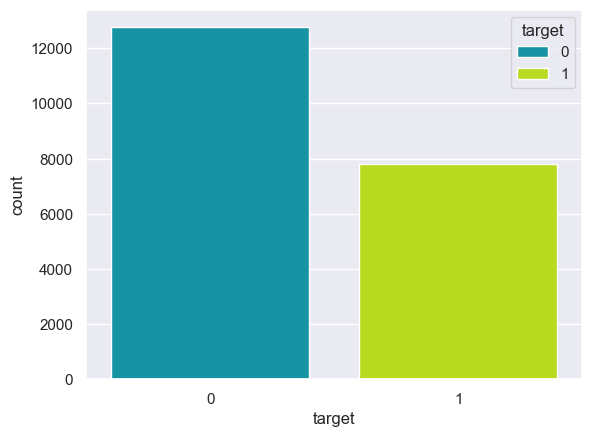

In [24]:
from collections import Counter
from matplotlib import pyplot as plt
import seaborn as sns

# Plot the imbalance between the targets 
print(sorted(Counter(y_train).items()))
sns.set_style('white')
sns.set(font_scale=1)
plt.figure()
sns.countplot(x=y_train, hue=y_train, palette='nipy_spectral')
plt.show()

[(0, 12766), (1, 12766)]


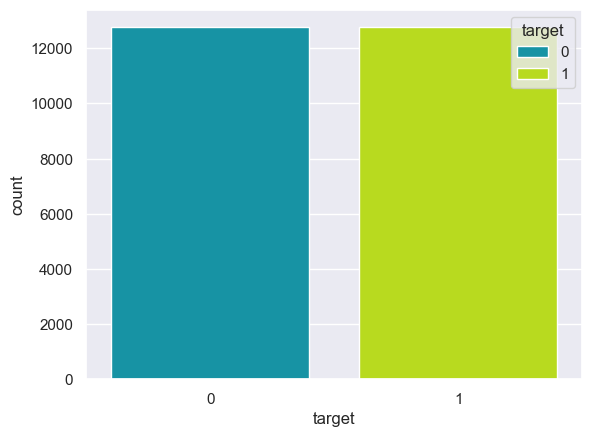

In [25]:
# from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler

# Balance targets with Synthetic Minority Oversampling Technique
# smote = SMOTE(random_state=0)
ros = RandomOverSampler()

X_train, y_train = ros.fit_resample(X_train, y_train)

# Plot the balance between classification targets 
print(sorted(Counter(y_train).items()))
sns.set_style('white')
sns.set(font_scale=1)
plt.figure()
sns.countplot(x=y_train, hue=y_train,palette='nipy_spectral')
plt.show()

In [26]:
# Print the shape of each part
print("Shapes:")
print("X_train: ", X_train.shape)
print("X_test:  ", X_test.shape)
print("y_train: ", y_train.shape)
print("y_test:  ", y_test.shape)

Shapes:
X_train:  (25532, 228)
X_test:   (5466, 228)
y_train:  (25532,)
y_test:   (5466,)


[<a href="#content">Back to top</a>]

## PCA <a name="6"></a>

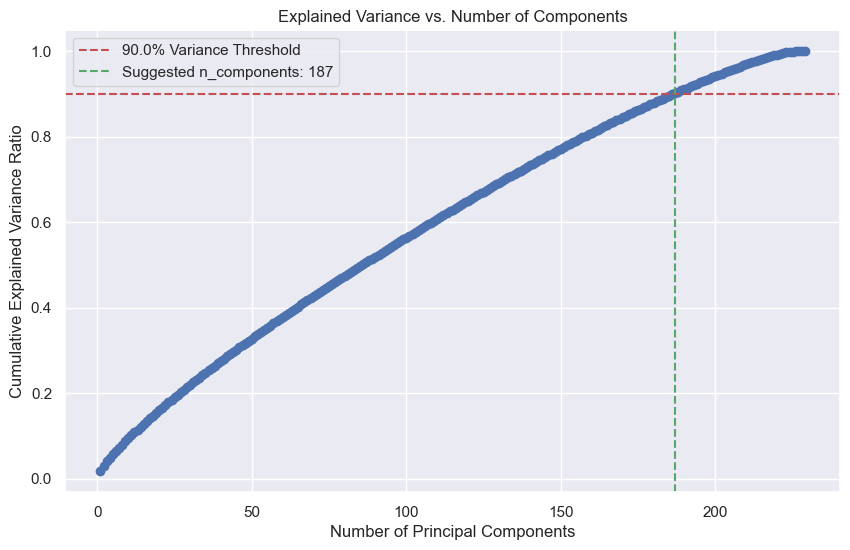


Suggested n_components (explained variance, 90%): 187
Minka's MLE suggests n_components = 228
Suggested n_components (MLE): 228


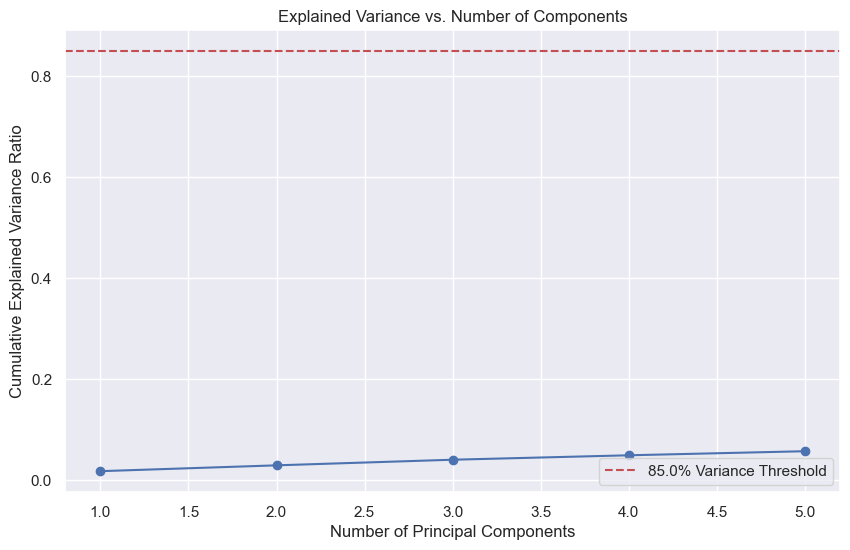

Suggested n_components (explained variance, 85%, max 5): None


In [27]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

def suggest_n_components_pca(data, method='explained_variance', variance_threshold=0.95, max_components=None):
    """
    Suggests the value of n_components for PCA based on different methods.

    Args:
        data (pd.DataFrame or np.ndarray): The input data (shape: n_samples, n_features).
        method (str, optional): The method to suggest n_components.
            - 'explained_variance': Suggests based on the cumulative explained variance ratio.
            - 'mle': Uses Minka's MLE to estimate the number of dimensions.
            Defaults to 'explained_variance'.
        variance_threshold (float, optional): The desired percentage of variance to retain
            (only used if method='explained_variance'). Defaults to 0.95.
        max_components (int, optional): The maximum number of components to consider.
            Defaults to the number of features in the data.

    Returns:
        int or None: The suggested value for n_components, or None if an error occurs.
    """
    if not isinstance(data, (pd.DataFrame, np.ndarray)):
        print("Error: Input data must be a Pandas DataFrame or a NumPy array.")
        return None

    data = np.array(data)
    n_features = data.shape[1]

    if max_components is None:
        max_components = n_features

    # Standardize the data before applying PCA
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(data)

    if method == 'explained_variance':
        pca = PCA(n_components=min(n_features, max_components))
        pca.fit(scaled_data)

        cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

        suggested_n = None
        for i, ratio in enumerate(cumulative_variance_ratio):
            if ratio >= variance_threshold:
                suggested_n = i + 1
                break

        plt.figure(figsize=(10, 6))
        plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, marker='o', linestyle='-')
        plt.xlabel('Number of Principal Components')
        plt.ylabel('Cumulative Explained Variance Ratio')
        plt.title('Explained Variance vs. Number of Components')
        plt.axhline(y=variance_threshold, color='r', linestyle='--', label=f'{variance_threshold*100}% Variance Threshold')
        if suggested_n is not None:
            plt.axvline(x=suggested_n, color='g', linestyle='--', label=f'Suggested n_components: {suggested_n}')
        plt.legend()
        plt.grid(True)
        plt.show()

        return suggested_n

    elif method == 'mle':
        pca_mle = PCA(n_components='mle')
        pca_mle.fit(scaled_data)
        suggested_n = pca_mle.n_components_
        print(f"Minka's MLE suggests n_components = {suggested_n}")
        return suggested_n

    else:
        print(f"Error: Invalid method '{method}'. Available methods are 'explained_variance' and 'mle'.")
        return None

# Suggest n_components based on explained variance (retaining 90% of variance)
suggested_components_ev = suggest_n_components_pca(df, method='explained_variance', variance_threshold=0.90)
print(f"\nSuggested n_components (explained variance, 90%): {suggested_components_ev}")

# Suggest n_components based on Minka's MLE
suggested_components_mle = suggest_n_components_pca(df, method='mle')
print(f"Suggested n_components (MLE): {suggested_components_mle}")

# Suggest n_components with a maximum limit
suggested_components_ev_limited = suggest_n_components_pca(df, method='explained_variance', variance_threshold=0.85, max_components=5)
print(f"Suggested n_components (explained variance, 85%, max 5): {suggested_components_ev_limited}")

In [28]:
from sklearn.decomposition import PCA

# Fit PCA on the training set
pca = PCA(n_components=187)  # Adjust n_components as needed
pca.fit(X_train)

# Transform both training and test sets
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)

# Print the shape of each part
print("Shapes:")
print("X_train: ", X_train.shape)
print("X_test:  ", X_test.shape)
print("y_train: ", y_train.shape)
print("y_test:  ", y_test.shape)

Shapes:
X_train:  (25532, 187)
X_test:   (5466, 187)
y_train:  (25532,)
y_test:   (5466,)


[<a href="#content">Back to top</a>]

## Machine Learning <a name="7"></a>

In [29]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier

# Instantiate the algorithms that will be used, placing them in a dictionary 
clfs = {"SVM":SVC(),
        "Decision":DecisionTreeClassifier(), 
        "RandomForest":RandomForestClassifier(), 
        "GradientBoost":GradientBoostingClassifier(),
        "K-nearest": KNeighborsClassifier(n_neighbors=3)}

In [30]:
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, roc_auc_score

# Create statistics with the results of training with different algorithms
def model_fit(clfs):
    fitted_model={}
    model_result = pd.DataFrame()
    # Iterate the clfs dictionary clfs
    for model_name, model in clfs.items():
        # Train the current model
        model.fit(X_train,y_train)
        # Add the current model name
        fitted_model.update({model_name:model})
        # Prediction of the current model 
        y_pred = model.predict(X_test)
        model_dict = {}
        model_dict['1.Algorithm'] = model_name
        # Calculate the metrics
        model_dict['2.Accuracy'] = round(accuracy_score(y_test, y_pred),3)
        model_dict['3.Precision'] = round(precision_score(y_test, y_pred),3)
        model_dict['4.Recall'] = round(recall_score(y_test, y_pred),3)
        model_dict['5.F1'] = round(f1_score(y_test, y_pred),3)
        model_dict['6.ROC'] = round(roc_auc_score(y_test, y_pred),3)
        model_result = model_result._append(model_dict,ignore_index=True)
    return fitted_model, model_result

# Run the function model_fit(clfs) 
fitted_model, model_result = model_fit(clfs)

# Display the results of the model_fit(clfs) function in a descending order
model_result.sort_values(by=['2.Accuracy'],ascending=False)

,1.Algorithm,2.Accuracy,3.Precision,4.Recall,5.F1,6.ROC
0,SVM,0.743,0.820,0.623,0.708,0.743
3,GradientBoost,0.739,0.809,0.624,0.705,0.739
2,RandomForest,0.719,0.847,0.534,0.655,0.719
1,Decision,0.657,0.689,0.572,0.625,0.657
4,K-nearest,0.620,0.662,0.491,0.564,0.620


[<a href="#content">Back to top</a>]

## Five-fold cross-validation  <a name="8"></a>

In [31]:
# # PCA dimentiality reduction 
# X = pca.transform(X)

# Cross validation
from sklearn.model_selection import cross_val_score
import numpy as np

# Create statistics with the results of the cross-validation of different estimators
def model_CV(clfs):
    estimated_model={}
    model_cv_result = pd.DataFrame()
    for model_name, model in clfs.items():
        estimated_model.update({model_name:model})
        scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
        model_dict = {}
        model_dict['1.Algorithm'] = model_name
        model_dict['2.Mean CV Score'] = round(scores.mean(), 4)
        model_dict['3.Standard Deviation'] = round(scores.std(), 4)
        model_dict['4.List of CV Scores'] = np.round(scores, 4)
        model_cv_result = model_cv_result._append(model_dict,ignore_index=True)
    return estimated_model, model_cv_result

# Run the model_CV(clsf) function
estimated_model, model_cv_result = model_CV(clfs)

# Display the results of cross_validation statistics in a descending order
model_cv_result.sort_values(by=['2.Mean CV Score'],ascending=False)

,1.Algorithm,2.Mean CV Score,3.Standard Deviation,4.List of CV Scores
2,RandomForest,0.8701,0.0509,"[0.8277, 0.8249, 0.8337, 0.925, 0.9393]"
0,SVM,0.7931,0.0173,"[0.7748, 0.7758, 0.7904, 0.804, 0.8204]"
1,Decision,0.7840,0.0447,"[0.746, 0.7482, 0.7489, 0.8306, 0.8463]"
3,GradientBoost,0.7512,0.0052,"[0.7474, 0.7439, 0.7538, 0.7521, 0.7589]"
4,K-nearest,0.7056,0.0382,"[0.6714, 0.6734, 0.679, 0.7472, 0.7571]"


[<a href="#content">Back to top</a>]

## Scrutinise for overfitting of the ML model with its default hyperparameter values (kernel='rbf', C=1.0, gamma=’scale’ <a name="8"></a>

In [32]:
# Instantiate the model
model = SVC()

# Calculate training accuracy using cross-validation
train_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
train_accuracy = train_scores.mean()

# Train the model on the entire training set
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate test accuracy
test_accuracy = accuracy_score(y_test, y_pred)

# Check for overfitting
if train_accuracy - test_accuracy > 0.05:  # Example threshold, adjust as needed
    print("Warning: Potential overfitting detected.")
    print("Train accuracy:", train_accuracy)
    print("Test accuracy:", test_accuracy)
else:
    print("No significant overfitting detected.")
    print("Train accuracy:", train_accuracy)
    print("Test accuracy:", test_accuracy)

No significant overfitting detected.
Train accuracy: 0.7930845821856455
Test accuracy: 0.743139407244786


[<a href="#content">Back to top</a>]

## Hyperparameter tuning <a name="9"></a>

In [33]:
def objective(trial, random_state=42):
    
    # Define the hyperparameters to tune - focusing on kernel, C, and gamma
    svc_kernel = trial.suggest_categorical('kernel', ['linear', 'rbf', 'poly', 'sigmoid'])
    svc_c = trial.suggest_float('C', 1e-3, 1e3, log=True)
    svc_gamma = trial.suggest_categorical('gamma', ['scale', 'auto'])

    # Create the SVC model with the suggested hyperparameters
    model = SVC(C=svc_c,
                  kernel=svc_kernel,
                  gamma=svc_gamma,
                  random_state=random_state)

    # Train the model
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy


In [34]:
import optuna

# Create an Optuna study to maximize accuracy
study = optuna.create_study(direction='maximize')

# Run the optimization for a certain number of trials
study.optimize(objective, n_trials=10)

# Print the best hyperparameters found
print("Best trial:")
trial = study.best_trial
print(f"  Value: {trial.value}")
print("  Params: ")
for key, value in trial.params.items():
    print(f"    {key}: {value}")

[I 2025-05-15 09:00:23,803] A new study created in memory with name: no-name-a67d9b03-5c16-4501-9a4b-1f072f2c5d3b
[I 2025-05-15 09:02:06,261] Trial 0 finished with value: 0.7292352725942188 and parameters: {'kernel': 'rbf', 'C': 0.11091621442828808, 'gamma': 'scale'}. Best is trial 0 with value: 0.7292352725942188.
[I 2025-05-15 11:29:03,819] Trial 1 finished with value: 0.7352725942188072 and parameters: {'kernel': 'linear', 'C': 6.087156227903576, 'gamma': 'auto'}. Best is trial 1 with value: 0.7352725942188072.
[I 2025-05-15 11:36:44,039] Trial 2 finished with value: 0.6968532747896085 and parameters: {'kernel': 'poly', 'C': 48.61159120329936, 'gamma': 'scale'}. Best is trial 1 with value: 0.7352725942188072.
[I 2025-05-15 11:49:41,101] Trial 3 finished with value: 0.6953896816684961 and parameters: {'kernel': 'rbf', 'C': 51.612257663920495, 'gamma': 'auto'}. Best is trial 1 with value: 0.7352725942188072.
[I 2025-05-15 11:52:00,502] Trial 4 finished with value: 0.6542261251372119 a

Best trial:
  Value: 0.7420417124039517
  Params: 
    kernel: rbf
    C: 0.40502186621945613
    gamma: auto


[<a href="#content">Back to top</a>]

## Scrutinise for overfitting of the model hyperparameter tuned by Optuna <a name="10"></a>

In [37]:
# Create an SVM model with hyperparamenters runed by Optuna
model = SVC(kernel='rbf', C=0.40502186621945613, gamma='auto') 

# Calculate training accuracy using cross-validation
train_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
train_accuracy = train_scores.mean()

# Train the model on the entire training set
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate test accuracy
test_accuracy = accuracy_score(y_test, y_pred)

# Check for overfitting
if train_accuracy - test_accuracy > 0.1:  # Example threshold, adjust as needed
    print("Warning: Potential overfitting detected.")
    print("Train accuracy:", train_accuracy)
    print("Test accuracy:", test_accuracy)
else:
    print("No significant overfitting detected.")
    print("Train accuracy:", train_accuracy)
    print("Test accuracy:", test_accuracy)

No significant overfitting detected.
Train accuracy: 0.7719342153128687
Test accuracy: 0.7420417124039517


[<a href="#content">Back to top</a>]

## Final ML model <a name="11"></a>

In [38]:
# Instantiate the final model
model = SVC(kernel='rbf', C=1, probability=True)

In [39]:
# Calculate training accuracy using cross-validation
train_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
train_accuracy = train_scores.mean()

# Train the model on the entire training set
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate test accuracy
test_accuracy = accuracy_score(y_test, y_pred)

# Check for overfitting
if train_accuracy - test_accuracy > 0.1:  # Example threshold, adjust as needed
    print("Warning: Potential overfitting detected.")
    print("Train accuracy:", train_accuracy)
    print("Test accuracy:", test_accuracy)
else:
    print("No significant overfitting detected.")
    print("Train accuracy:", train_accuracy)
    print("Test accuracy:", test_accuracy)

No significant overfitting detected.
Train accuracy: 0.7930845821856455
Test accuracy: 0.743139407244786


In [40]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation
scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')

print("Cross-validation scores:", np.round(scores, 3))
print("Mean cross-validation score:", np.round(scores.mean(), 3))

Cross-validation scores: [0.781 0.776 0.783 0.775 0.782]
Mean cross-validation score: 0.779


In [41]:
# ML 
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluation
acc = round(accuracy_score(y_test, y_pred),3)
print('Accuracy: ', acc)
pre = round(precision_score(y_test, y_pred),3)
print('Precision: ', pre) 
rec = round(recall_score(y_test, y_pred),3)
print('Recall: ',rec) 
f1 = round(f1_score(y_test, y_pred),3)
print('F1: ', f1) 
roc = round(roc_auc_score(y_test, y_pred),3) 
print('ROC: ', roc)

Accuracy:  0.743
Precision:  0.82
Recall:  0.623
F1:  0.708
ROC:  0.743


[<a href="#content">Back to top</a>]

## Plot the learning curve and ROC  <a name="12"></a>

C:\Users\ivano\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
10 fits failed out of a total of 25.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\ivano\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ivano\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ivano\AppDat

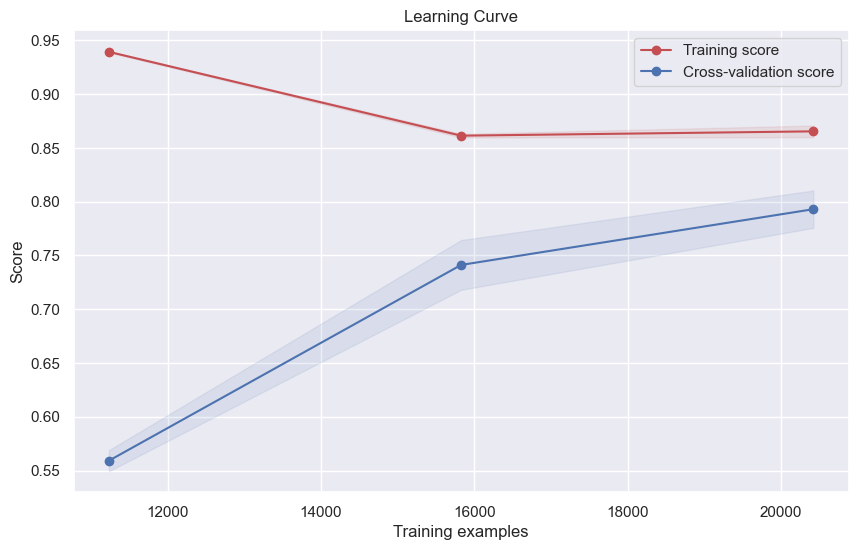

In [42]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    model, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1
)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.title("Learning Curve")
plt.xlabel("Training examples")
plt.ylabel("Score")

plt.fill_between(
    train_sizes,
    train_scores_mean - train_scores_std,
    train_scores_mean + train_scores_std,
    alpha=0.1,
    color="r",
)
plt.fill_between(
    train_sizes,
    test_scores_mean - test_scores_std,
    test_scores_mean + test_scores_std,
    alpha=0.1,
    color="b",
)
plt.plot(train_sizes, train_scores_mean, "o-", color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, "o-", color="b", label="Cross-validation score")
plt.legend(loc="best")
plt.show()

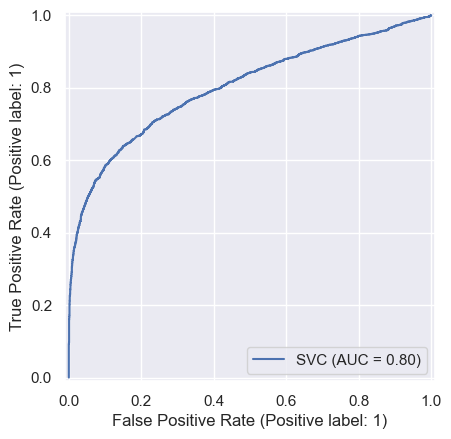

In [43]:
from sklearn.metrics import RocCurveDisplay

svc_disp = RocCurveDisplay.from_estimator(model, X_test, y_test)
plt.show()

[<a href="#content">Back to top</a>]

## Confusion matrix, classification report and AUC <a name="13"></a>

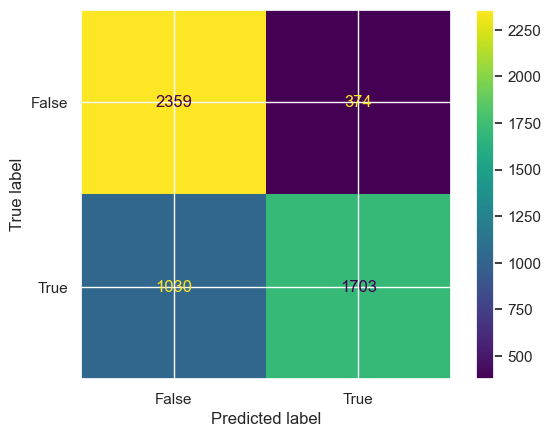

In [44]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix

# SVC prediction
predicted = model.fit(X_train, y_train).predict(X_test)

# Calculate the confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, predicted)

# Display confusion matrix
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

In [45]:
# Classification report 
from sklearn.metrics import classification_report

# Print the classification report 
target_names = ['Active (target 1) ', 'Inactive (target 0)']
print(classification_report(y_test, predicted, target_names=target_names))

                     precision    recall  f1-score   support

 Active (target 1)        0.70      0.86      0.77      2733
Inactive (target 0)       0.82      0.62      0.71      2733

           accuracy                           0.74      5466
          macro avg       0.76      0.74      0.74      5466
       weighted avg       0.76      0.74      0.74      5466



[<a href="#content">Back to top</a>]